### Hypothesis :- There is significant diffrence between the number of author per paper accorss diffrent categories. i.e in some category there are more number of author working togather on a paper than other category 

##### here we have loaded our data into dataframe.

In [6]:
import pandas as pd
import os

file_path = r'neurips_arxiv.csv'
columns_to_keep = ['title', 'authors', 'categories', 'abstract', 'update_date']

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

chunks = []
chunk_size = 10000
with pd.read_csv(file_path, chunksize=chunk_size) as reader:
    for i, chunk in enumerate(reader):        
        
        present_columns = [col for col in columns_to_keep if col in chunk.columns]
        chunk_filtered = chunk[present_columns]
        
        
        if chunk_filtered.empty:
            print(f"Chunk {i} is empty after filtering columns.")
        else:
            
            chunks.append(chunk_filtered)
df= pd.concat(chunks, ignore_index=True)




##### there are multiple sub categories under each stream so we have gouped them all under a parent category (e.g astro-ph.co,astro-ph.EP,astro-ph.GA all have grouped under astro category)

In [7]:
import pandas as pd
import os


df['simplified_category'] = df['categories'].str.split('-').str[0].str.split('.').str[0]

grouped_data = df.groupby('simplified_category').size().reset_index(name='count')


##### to get the number of authors per paper.

In [8]:
import re
df['author_count'] = df['authors'].apply(lambda x: len(re.split(r',| and ', x)))

##### here we have ploted a graph showing average number of authors in categories over time.

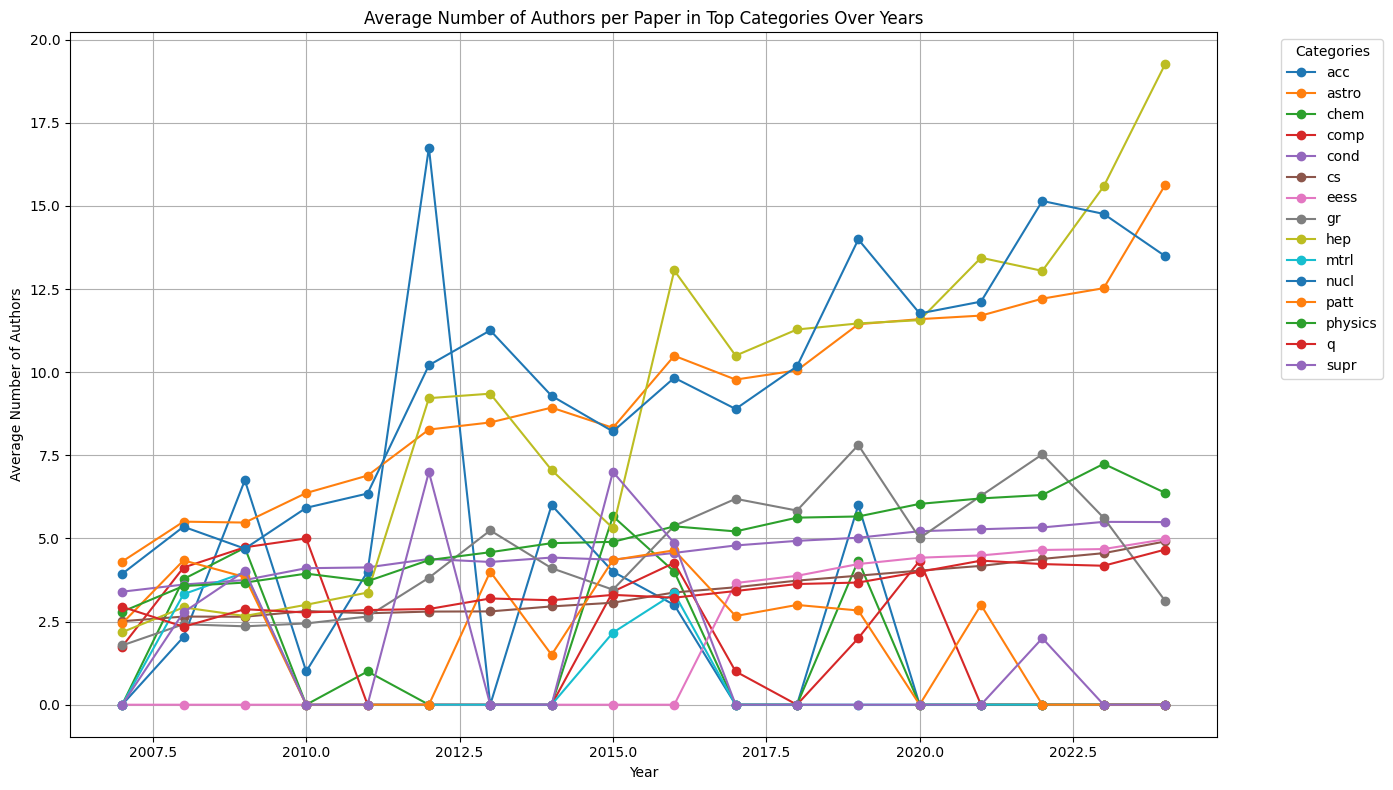

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df['update_date'] = pd.to_datetime(df['update_date'], errors='coerce')


df['year'] = df['update_date'].dt.year

avg_authors_per_category = df.groupby('simplified_category')['author_count'].mean().reset_index()


top_categories = avg_authors_per_category.nlargest(15, 'author_count')['simplified_category']


top_categories_data = df[df['simplified_category'].isin(top_categories)]
avg_authors_per_year_category = top_categories_data.groupby(['year', 'simplified_category'])['author_count'].mean().reset_index()
pivot_table = avg_authors_per_year_category.pivot(index='year', columns='simplified_category', values='author_count').fillna(0)

plt.figure(figsize=(14, 8))
for category in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[category], marker='o', label=category)

plt.title('Average Number of Authors per Paper in Top Categories Over Years')
plt.xlabel('Year')
plt.ylabel('Average Number of Authors')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Finding :- we can clearly see the pattern that number of authors in certain categories have increased over time.

#### here we have used ANOVA(Analysis of Variance) to test differences between category and number of author. To supprot our hypothese that diffrent categories have diffrent number of authors working on a paper .

In [9]:
import pandas as pd
import scipy.stats as stats


grouped_data = df.groupby('simplified_category')['author_count'].apply(list)
anova_data = [group for group in grouped_data]
f_statistic, p_value = stats.f_oneway(*anova_data)

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

alpha = 0.05  
if p_value < alpha:
    print(" There are significant differences in author counts between categories.")
else:
    print("No significant differences in author counts between categories.")


F-Statistic: 783.1819179575929
P-Value: 0.0
Reject the null hypothesis: There are significant differences in author counts between categories.


#### There is significant differences in author counts between the categories. This suggests that some categories have more authors associated with them than others, indicating variability in author representation across research fields in the dataset.

##### Average number of author per categories.

In [8]:
average_authors_by_category = df.groupby('simplified_category')['author_count'].mean().reset_index()

# Step 3: Find the category with the maximum average number of authors
top_categories = average_authors_by_category.sort_values(by='author_count', ascending=False).head(30)

# Step 4: Display the results
print("Category with the highest average number of authors:")
print(top_categories)

Category with the highest average number of authors:
   simplified_category  author_count
4                astro      8.547941
22                nucl      8.177842
18                 hep      7.060167
24             physics      4.942791
0                  acc      4.173913
15                eess      4.135165
11                cond      3.950739
17                  gr      3.901760
12                  cs      3.676647
8                 chem      3.488372
30                supr      3.333333
10                comp      3.314286
26                   q      3.212690
27               quant      3.171827
23                patt      3.092920
7                 chao      2.954237
25               plasm      2.928571
5                 atom      2.926471
20                mtrl      2.909091
29                stat      2.731752
1                 adap      2.486928
9                  cmp      2.355705
21                nlin      2.347867
28                solv      2.142180
14                econ